# DATSCIW261 ASSIGNMENT 
Version 2016-01-27 (FINAL)
Week 3 ASSIGNMENTS

---
Link: https://docs.google.com/spreadsheets/d/1ncFQl5Tovn-16slD8mYjP_nzMTPSfiGeLLzW8v_sMjg/edit?usp=sharing

## Student Information
<p><strong>Name:</strong> charles Kekeh</p>
<p><strong>e-mail:</strong> ckekeh@ischool.berkeley.edu</p>
<p><strong>class name:</strong> W261 Homework2</p>
<p><strong>week number:</strong> 02</p>
<p><strong>Date of submission:</strong> 06/03/2016</p>

## HW3.0 Written answers

### 1. How do you merge  two sorted  lists/arrays of records of the form [key, value]?

We assume that primary sorting is required on the keys and secondary sorting is required on the values here.

If the lists are sorted then a merge of the lists keeps one pointer into each of the two sorted lists. Those point to the current key and value. A third pointer is kept on the resulting merged list.
The 2 input lists are processed sequentially as follows:

<code>
if currentkey[list1] < currentkey[list2]
    output all the pairs with key value currentkey[list1] from list1
    increment currentkey[list1] to the next key
else if if currentkey[list2] < currentkey[list1]
    output all the pairs with key value currentkey[list2] from list2
    increment currentkey[list2] to the next key
else if currentkey[list2] == currentkey[list1]
    if currentvalue[list1] < currentvalue[list2]
        output the current pair with key currentkey[list1] and value currentvalue[list1] from list1
        increment currentvalue[list1] to the next value
    else if currentvalue[list2] < currentvalue[list1]
        output the current pair with key currentkey[list2] and value currentvalue[list2] from list2
        increment currentvalue[list2] to the next key
    else if currentvalue[list1] == currentvalue[list1]
        output the current pair with key currentkey[list1] and value currentvalue[list1] from list1
        increment currentvalue[list1] to the next key
        increment currentvalue[list2] to the next key
    endif
</code>

### 1. Where is this  used in Hadoop MapReduce? [Hint within the shuffle]

This merge is used during the shuffle operation to merge the spills from the mapper that are on disk. It is also used on the reducer side to merge the streams from all the mappers into an ordered sequence before they are presented to the reducers.

### 1. What is  a combiner function in the context of Hadoop? 

In the context of Hadoop, a conbiner function is an optimization that is meant to reduce the amount of bandwidth required for a map reduce implementation. It is also mean to reduce the computation cost on the reducer when applied on the reducer side.
The role of the combiner is to aggregate records with the same key on the mapper side and also on the reducer side when execution profiles allow for it.
On the mapper side, the combiner may be instantiated to combine records with identical keys into single multiple key-multiple value records that can then be sent over the network to the reducers as part of the shuffle operation.
On the mapper side, still, a combiner may be instantiated to combine the records of the spills of a mapper on disk based on their keys.
And on the reducer side, a combiner may be instantiated to combine the records of that have already arrived as part of a shuffle, when a lagging mapper's operation prevents a reducer from starting to process.
Combiners must implement operations that are associative and commutative. Combiners and reducers must share the same signature for their imput as the output of mappers. Combiners must also emmit records that have the same signature as the input of reducers.

### 1. Give an example where it can be used and justify why it should be used in the context of this problem.

A typical example for the use of combiners is the wordcount example. In this example, mappers output key values of the form (word, 1) for every word in a document. Combiners could accumulate counts for identical words on the mapper or reducer side and considerably reduce network demands for the shuffle operation by doing so.
On the reducer side, their usage could contruct partial sums while a reducer is waiting for a straddler mapper, and reduce the amount of computation time that the reducer will need to tally the word counts coming from across all mappers.

### 1. What is the Hadoop shuffle?

The hadoop shuffle is the operation that is at the heart to Hadoop's mapreduce oepration. It acts as a barrier in the processing of the mappers and before the reducers execute.
Its responsibility is to gather the outputs from the mappers and redirect to the reducers. The operation is a complex one that involves the use of combiners, collecting mapper output from multiple spill files on disk, performing merge sort operations and finally partitionning appropriate mapper output to the reducer nodes where a final merge sort step orders the data from all the mappers that produced output for a reducer into an ordered sequence.

# HW3.1 consumer complaints dataset: Use Counters to do EDA (exploratory data analysis and to monitor progress)
Counters are lightweight objects in Hadoop that allow you to keep track of system progress in both the map and reduce stages of processing. By default, Hadoop defines a number of standard counters in "groups"; these show up in the jobtracker webapp, giving you information such as "Map input records", "Map output records", etc. 

While processing information/data using MapReduce job, it is a challenge to monitor the progress of parallel threads running across nodes of distributed clusters. Moreover, it is also complicated to distinguish between the data that has been processed and the data which is yet to be processed. The MapReduce Framework offers a provision of user-defined Counters, which can be effectively utilized to monitor the progress of data across nodes of distributed clusters.

Use the Consumer Complaints  Dataset provide here to complete this question:


     https://www.dropbox.com/s/vbalm3yva2rr86m/Consumer_Complaints.csv?dl=0

The consumer complaints dataset consists of diverse consumer complaints, which have been reported across the United States regarding various types of loans. The dataset consists of records of the form:

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?

Here’s is the first few lines of the  of the Consumer Complaints  Dataset:

Complaint ID,Product,Sub-product,Issue,Sub-issue,State,ZIP code,Submitted via,Date received,Date sent to company,Company,Company response,Timely response?,Consumer disputed?
1114245,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,FL,32219,Web,11/13/2014,11/13/2014,"Choice Recovery, Inc.",Closed with explanation,Yes,
1114488,Debt collection,Medical,Disclosure verification of debt,Right to dispute notice not received,TX,75006,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,
1114255,Bank account or service,Checking account,Deposits and withdrawals,,NY,11102,Web,11/13/2014,11/13/2014,"FNIS (Fidelity National Information Services, Inc.)",In progress,Yes,
1115106,Debt collection,"Other (phone, health club, etc.)",Communication tactics,Frequent or repeated calls,GA,31721,Web,11/13/2014,11/13/2014,"Expert Global Solutions, Inc.",In progress,Yes,

User-defined Counters

Now, let’s use Hadoop Counters to identify the number of complaints pertaining to debt collection, mortgage and other categories (all other categories get lumped into this one) in the consumer complaints dataset. Basically produce the distribution of the Product column in this dataset using counters (limited to 3 counters here).

Hadoop offers Job Tracker, an UI tool to determine the status and statistics of all jobs. Using the job tracker UI, developers can view the Counters that have been created. Screenshot your  job tracker UI as your job completes and include it here. Make sure that your user defined counters are visible. 

In [2]:
# Set up the environment for this task
!hdfs dfs -rm -f -r /Homework3/EDA

In [3]:
!hdfs dfs -mkdir -p /Homework3/EDA

In [4]:
!hdfs dfs -put ./Consumer_Complaints.csv /Homework3/EDA

In [5]:
%%writefile mapper.py
#!/usr/bin/python
import sys
# input comes from STDIN (standard input)
for line in sys.stdin:
    # Split the input on commas
    splits = line.split(',')
    
    if splits[1].lower() == 'debt collection':
        sys.stderr.write("reporter:counter:Product,DebtCollection,1\n")
    elif splits[1].lower() == 'mortgage':
        sys.stderr.write("reporter:counter:Product,Mortgage,1\n")
    else:
        sys.stderr.write("reporter:counter:Product,Other,1\n")
    
    print '{0!s}\t{1!s}'.format(splits[0], ",".join(splits[1:]))

Overwriting mapper.py


In [6]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.strip()

Overwriting reducer.py


In [7]:
#!cat ./Consumer_Complaints.csv | python mapper.py | sort -k1,1nr | python reducer.py | head -n 10

In [8]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/EDA/Consumer_Complaints.csv -output /Homework3/EDA/Output 

packageJobJar: [/tmp/hadoop-unjar5464630359463087462/] [] /tmp/streamjob4171722689202237423.jar tmpDir=null
16/05/30 21:29:42 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:29:42 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:29:42 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:29:42 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:29:43 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0177
16/05/30 21:29:43 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0177
16/05/30 21:29:43 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0177/
16/05/30 21:29:43 INFO mapreduce.Job: Running job: job_1463793227124_0177
16/05/30 21:29:48 INFO mapreduce.Job: Job job_1463793227124_0177 running in uber mode : false
16/05/30 21:29:48 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

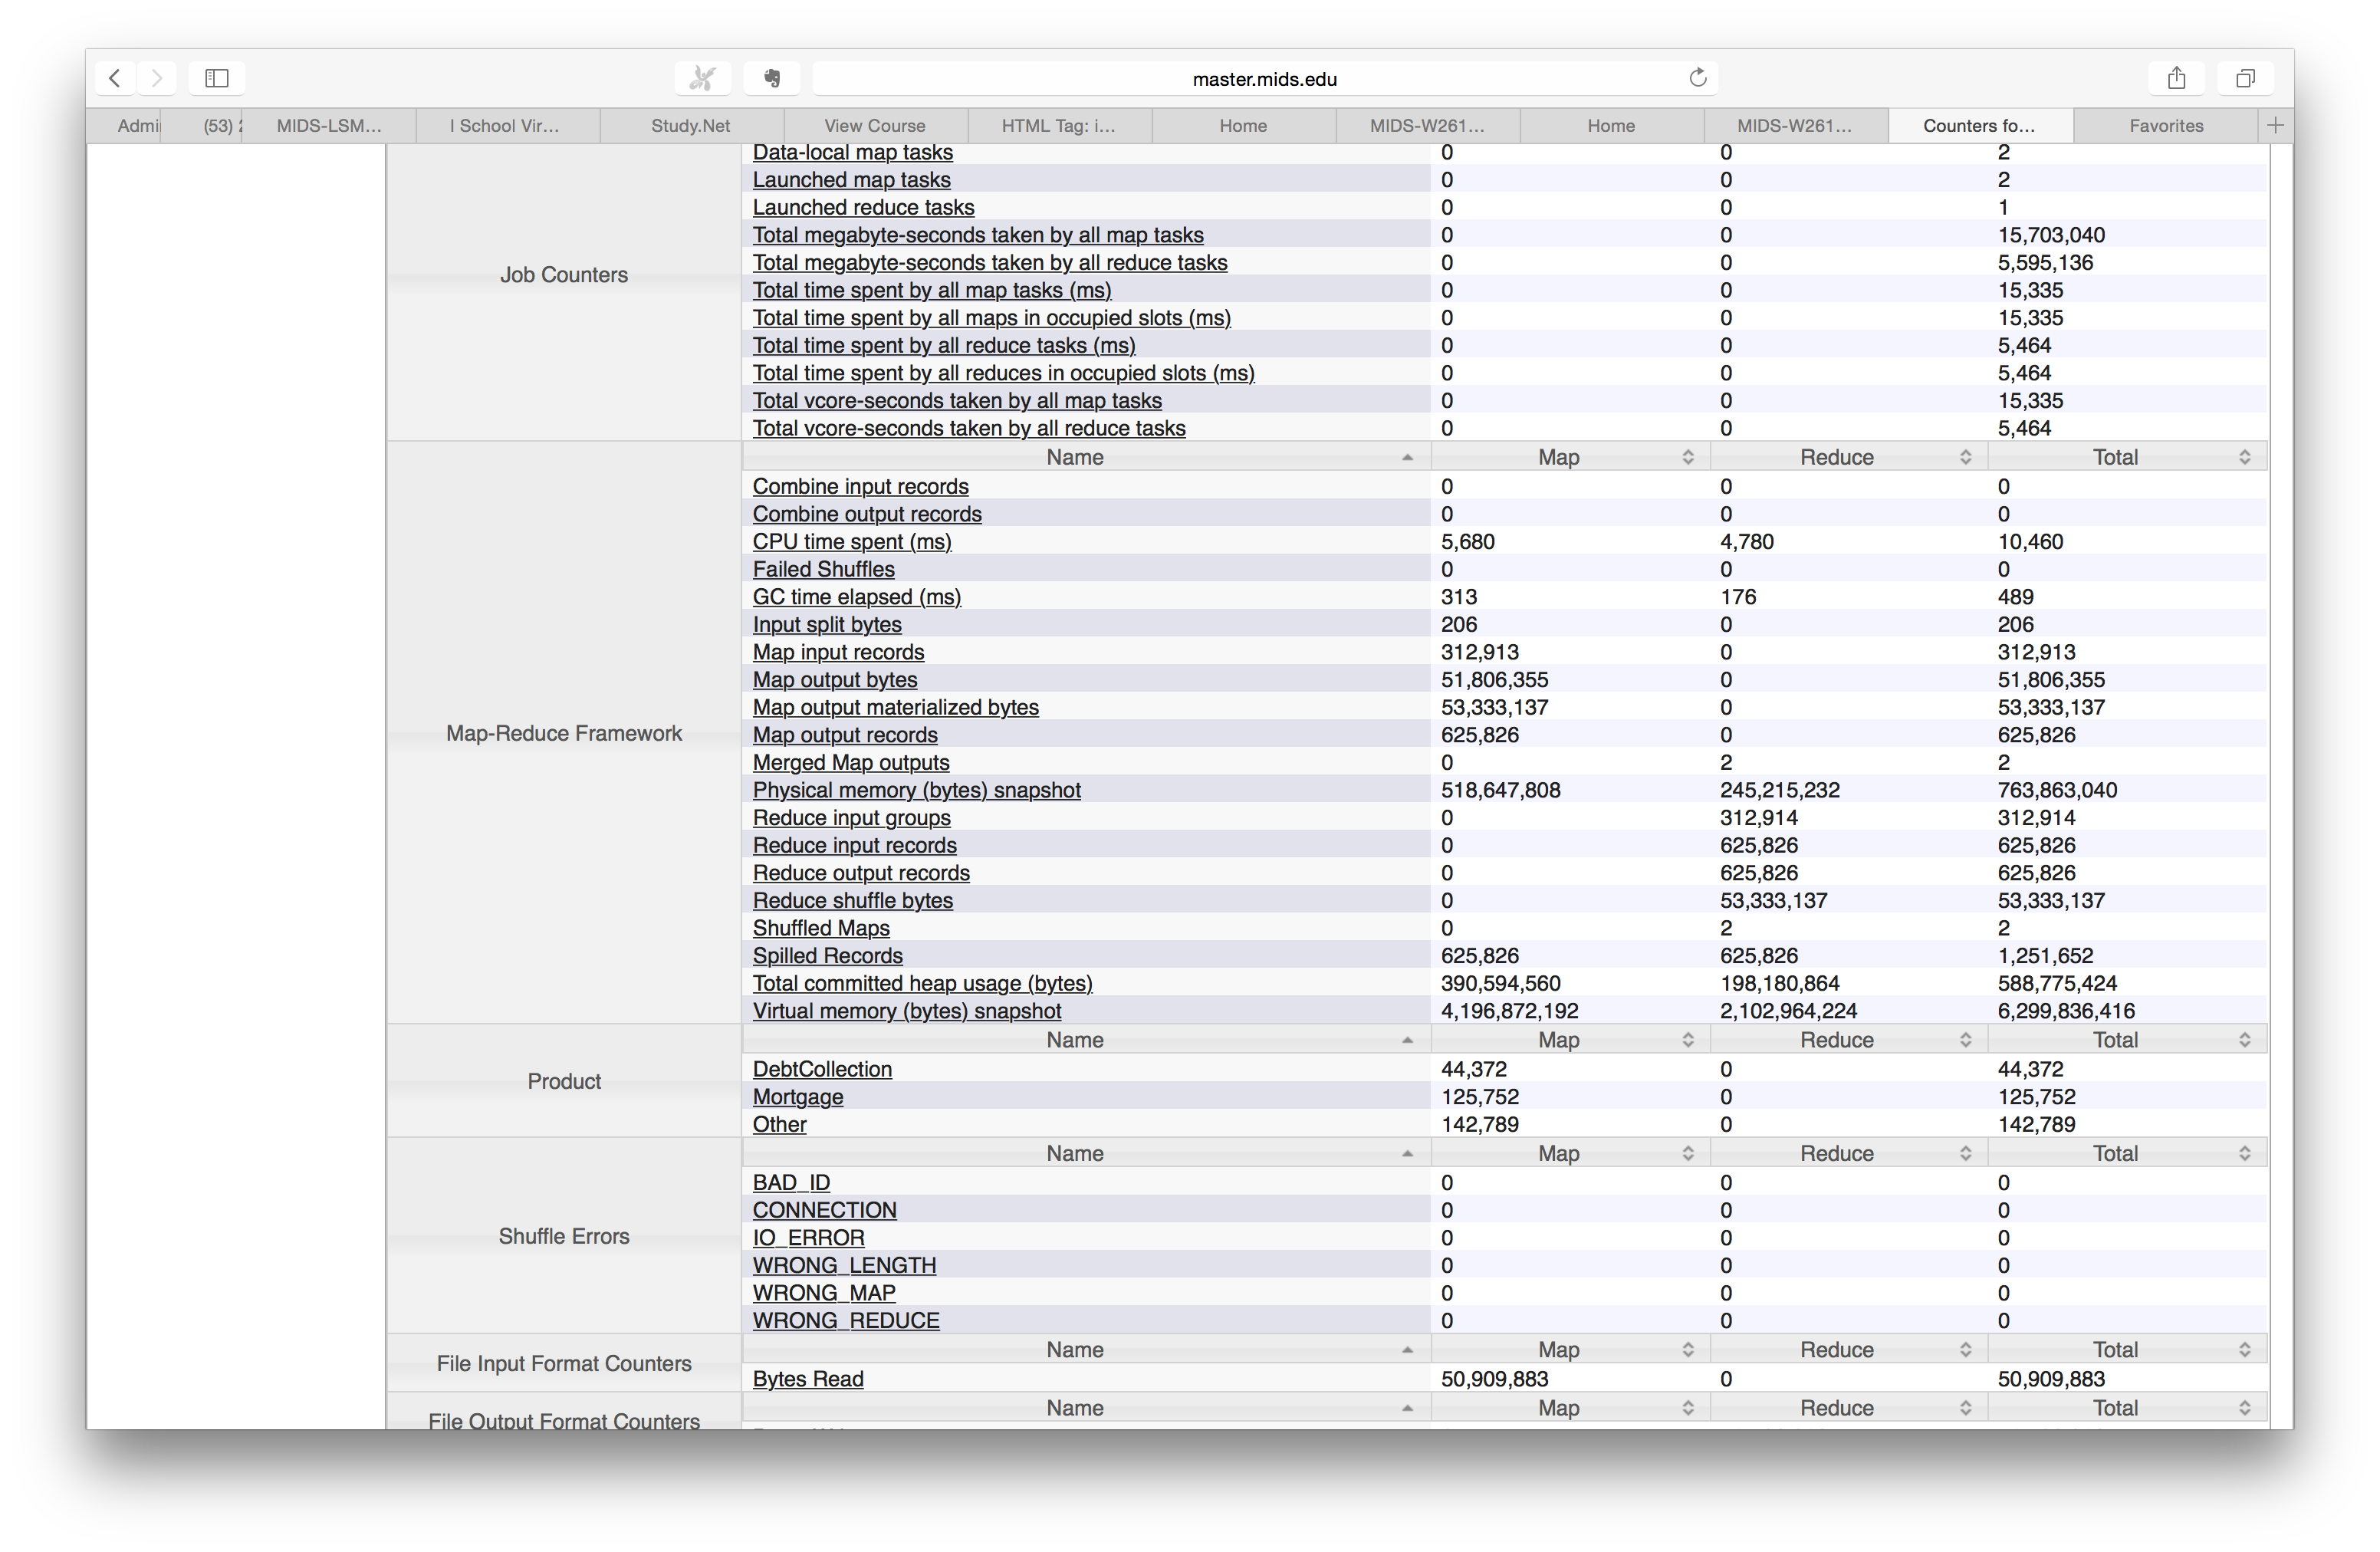

In [9]:
from IPython.display import Image
Image(filename='W261HW3.1CountersScreenshot.png') 

# HW 3.2 Analyze the performance of your Mappers, Combiners and Reducers using Counters

For this brief study the Input file will be one record (the next line only): 
foo foo quux labs foo bar quux

## a) Perform a word count analysis of this single record dataset using a Mapper and Reducer based WordCount (i.e., no combiners are used here) using user defined Counters to count up how many time the mapper and reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing this word count job. The answer  should be 1 and 4 respectively. Please explain.

The results I obtain below (without any configuration) of the hadoop job request show a mapper count of 2 and a reduce count of 1. The framework will typically select the number mappers based on the number of blocks in the input file. Each mapper will typically be assigned a block on hdfs where the recommended block size if between 128 MB and 1TB.
Without programmer configuration, the number of reducers is chosen by the framework. It is typically chosen such that a reducer processes a multiple of the block size.

### Set up the hadoop folder for this problem

In [10]:
!hdfs dfs -rm -f -r /Homework3/Wordcount1

16/05/30 21:30:07 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/Wordcount1


In [11]:
!hdfs dfs -mkdir -p /Homework3/Wordcount1

In [12]:
!echo 'foo foo quux labs foo bar quux' > ./Wordcount1Input.txt

In [13]:
!hdfs dfs -put ./Wordcount1Input.txt /Homework3/Wordcount1/Wordcount1Input.txt

In [14]:
%%writefile mapper.py
#!/usr/bin/python
## mapper.py
## Author: Charles Kekeh
## Description: mapper code for HW1.2-1.5

import sys
import re

# Increment the mapper count
sys.stderr.write("reporter:counter:WordcountPerformance,MapperCount,1\n")

WORD_RE = re.compile(r'\w+')
                                          
# Process the input file
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip().lower()
    # split the line into words. Remove any empty string
    words = filter(None, WORD_RE.findall(line))
    for word in words:
        # write the results to STDOUT (standard output);
        # what we output here will be the input for the
        # Reduce step, i.e. the input for reducer.py
        #
        # tab-delimited; the trivial word count is 1
        print '%s\t%s' % (word, 1)

Overwriting mapper.py


In [15]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# Increment the redecuer count
sys.stderr.write("reporter:counter:WordcountPerformance,ReducerCount,1\n")

current_word = None
current_count = 0
word = None

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    word, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if current_word == word:
        current_count += count
    else:
        if current_word:
            # write result to STDOUT
            print '%s\t%s' % (current_word, current_count)
        current_count = count
        current_word = word

# do not forget to output the last word if needed!
if current_word == word:
    print '%s\t%s' % (current_word, current_count)

Overwriting reducer.py


In [16]:
!cat ./Wordcount1Input.txt | python mapper.py | sort -k1,1nr | python reducer.py | head -n 10

reporter:counter:WordcountPerformance,MapperCount,1
reporter:counter:WordcountPerformance,ReducerCount,1
bar	1
foo	3
labs	1
quux	2


In [17]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/Wordcount1/Wordcount1Input.txt -output /Homework3/Wordcount1/Output 

packageJobJar: [/tmp/hadoop-unjar8966779588293337337/] [] /tmp/streamjob2309122171662307117.jar tmpDir=null
16/05/30 21:30:14 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:30:14 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:30:15 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:30:15 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:30:15 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0178
16/05/30 21:30:15 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0178
16/05/30 21:30:15 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0178/
16/05/30 21:30:15 INFO mapreduce.Job: Running job: job_1463793227124_0178
16/05/30 21:30:20 INFO mapreduce.Job: Job job_1463793227124_0178 running in uber mode : false
16/05/30 21:30:20 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

### b) Please use multiple mappers and reducers for these jobs (at least 2 mappers and 2 reducers). Perform a word count analysis of the Issue column of the Consumer Complaints  Dataset using a Mapper and Reducer based WordCount (i.e., no combiners used anywhere)  using user defined Counters to count up how many time the mapper and reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing your word count job. 

We see from the code below that the number of mappers and reducers is set to the number configured in the job request. That number is 2. No additional mappers and reducers are created by the framework.

#### Set up the enviroment for this job

In [18]:
!hdfs dfs -rm -f -r /Homework3/Wordcount2

16/05/30 21:30:33 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/Wordcount2


In [19]:
!hdfs dfs -mkdir -p /Homework3/Wordcount2

In [20]:
%%writefile mapper.py
#!/usr/bin/python
import sys
import re

# Increment the mapper count
sys.stderr.write("reporter:counter:WordcountPerformance,MapperCount,1\n")

WORD_RE = re.compile(r'\w+')

# input comes from STDIN (standard input)
for line in sys.stdin:
    # Split the input on commas
    splits = line.split(',')
    
    # Break each word in the issue column and output with an initial count of 1
    for word in WORD_RE.findall(splits[3]):
        print '{0!s}\t{1:n}'.format(word, 1)

Overwriting mapper.py


In [21]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# Increment the redecuer count
sys.stderr.write("reporter:counter:WordcountPerformance,ReducerCount,1\n")

current_word = None
current_count = 0
word = None

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    word, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if current_word == word:
        current_count += count
    else:
        if current_word:
            # write result to STDOUT
            print '%s\t%s' % (current_word, current_count)
        current_count = count
        current_word = word

# do not forget to output the last word if needed!
if current_word == word:
    print '%s\t%s' % (current_word, current_count)

Overwriting reducer.py


In [22]:
!cat ./Consumer_Complaints.csv | python mapper.py | sort -k1,1nr | python reducer.py | head -n 10

reporter:counter:WordcountPerformance,ReducerCount,1
reporter:counter:WordcountPerformance,MapperCount,1
a	3503
account	4126
Account	16555
acct	163
action	2505
advance	240
Advertising	1193
amount	98
amt	71
an	2505


In [23]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.maps=2 -D mapreduce.job.reduces=2 -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/EDA/Consumer_Complaints.csv -output /Homework3/Wordcount2/Output 

packageJobJar: [/tmp/hadoop-unjar3095234740063443376/] [] /tmp/streamjob7015417444898497716.jar tmpDir=null
16/05/30 21:30:46 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:30:46 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:30:46 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:30:46 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:30:47 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0179
16/05/30 21:30:47 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0179
16/05/30 21:30:47 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0179/
16/05/30 21:30:47 INFO mapreduce.Job: Running job: job_1463793227124_0179
16/05/30 21:30:52 INFO mapreduce.Job: Job job_1463793227124_0179 running in uber mode : false
16/05/30 21:30:52 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

### c) Perform a word count analysis of the Issue column of the Consumer Complaints  Dataset using a Mapper, Reducer, and standalone combiner (i.e., not an in-memory combiner) based WordCount using user defined Counters to count up how many time the mapper, combiner, reducer are called. What is the value of your user defined Mapper Counter, and Reducer Counter after completing your word count job.

We can see from the log of the execution of the job request below that the number of reducers in the run is now 6 indicating that 4 additional reducer instances were created as combiners for the task

#### Set up the enviroment for this job

In [24]:
!hdfs dfs -rm -f -r /Homework3/Wordcount3

16/05/30 21:31:10 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/Wordcount3


In [25]:
!hdfs dfs -mkdir -p /Homework3/Wordcount3

In [26]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.maps=2 -D mapreduce.job.reduces=2 -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -combiner reducer.py -input /Homework3/EDA/Consumer_Complaints.csv -output /Homework3/Wordcount3/Output 

packageJobJar: [/tmp/hadoop-unjar6747696636065379140/] [] /tmp/streamjob2013133949866094505.jar tmpDir=null
16/05/30 21:31:14 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:31:14 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:31:15 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:31:15 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:31:15 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0180
16/05/30 21:31:15 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0180
16/05/30 21:31:15 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0180/
16/05/30 21:31:15 INFO mapreduce.Job: Running job: job_1463793227124_0180
16/05/30 21:31:20 INFO mapreduce.Job: Job job_1463793227124_0180 running in uber mode : false
16/05/30 21:31:20 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

### d) Using a single reducer: What are the top 50 most frequent terms in your word count analysis? Present the top 50 terms and their frequency and their relative frequency. Present the top 50 terms and their frequency and their relative frequency. If there are ties please sort the tokens in alphanumeric/string order. Present bottom 10 tokens (least frequent items). 

#### Set up the enviromennt for this run

In [27]:
!hdfs dfs -rm -f -r /Homework3/Wordcount4

16/05/30 21:31:39 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/Wordcount4


In [28]:
!hdfs dfs -mkdir -p /Homework3/Wordcount4

#### Set up a mapper and reducer to perfom the word count

In [29]:
%%writefile mapper.py
#!/usr/bin/python
import sys
import re

# Increment the mapper count
sys.stderr.write("reporter:counter:WordcountPerformance,MapperCount,1\n")

WORD_RE = re.compile(r'\w+')

# input comes from STDIN (standard input)
for line in sys.stdin:
    # Split the input on commas
    splits = line.split(',')
    
    # Break each word in the issue column and output with an initial count of 1
    for word in WORD_RE.findall(splits[3]):
        print '{0!s}\t{1:n}'.format(word, 1).strip()
        print '{0!s}\t{1:n}'.format('*', 1).strip()

Overwriting mapper.py


In [30]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# Increment the reducer count
sys.stderr.write("reporter:counter:WordcountPerformance,ReducerCount,1\n")

current_word = None
current_count = 0
word = None
total_word_count = -1

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    word, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if current_word == word:
        current_count += count
    else:
        if current_word:
            if total_word_count == -1:
                total_word_count = current_count
            # write word, frequency and relative frequency to STDOUT
            print '{0!s}\t{1:n}\t{2:f}'.format(current_word, current_count, float(current_count)/total_word_count).strip()

        current_count = count
        current_word = word

# do not forget to output the last word if needed!
if current_word == word:
    print '{0!s}\t{1:n}\t{2:f}'.format(current_word, current_count, float(current_count)/total_word_count).strip()

Overwriting reducer.py


In [31]:
!cat ./Consumer_Complaints.csv | python mapper.py | sort -k1,1nr | python reducer.py | head -n 10

reporter:counter:WordcountPerformance,MapperCount,1
reporter:counter:WordcountPerformance,ReducerCount,1
*	1000113	1.000000
a	3503	0.003503
account	4126	0.004126
Account	16555	0.016553
acct	163	0.000163
action	2505	0.002505
advance	240	0.000240
Advertising	1193	0.001193
amount	98	0.000098
amt	71	0.000071


In [32]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.maps=2 -D mapreduce.job.reduces=1 -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/EDA/Consumer_Complaints.csv -output /Homework3/Wordcount4/Output 

packageJobJar: [/tmp/hadoop-unjar2412904840375004916/] [] /tmp/streamjob8888418879494425482.jar tmpDir=null
16/05/30 21:31:57 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:31:57 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:31:58 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:31:58 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:31:58 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0181
16/05/30 21:31:58 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0181
16/05/30 21:31:58 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0181/
16/05/30 21:31:58 INFO mapreduce.Job: Running job: job_1463793227124_0181
16/05/30 21:32:03 INFO mapreduce.Job: Job job_1463793227124_0181 running in uber mode : false
16/05/30 21:32:03 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

In [33]:
!hdfs dfs -cat /Homework3/Wordcount4/Output/part-00000 | head -n 10

*	1000113	1.000000
APR	3431	0.003431
ATM	2422	0.002422
Account	16555	0.016553
Advertising	1193	0.001193
Application	8868	0.008867
Applied	139	0.000139
Arbitration	168	0.000168
Balance	597	0.000597
Bankruptcy	222	0.000222


#### Create an identity mapper and reducer to sort the results

In [34]:
!hdfs dfs -rm -f -r /Homework3/Wordcount4Sorted

16/05/30 21:32:28 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/Wordcount4Sorted


In [35]:
!hdfs dfs -mkdir -p /Homework3/Wordcount4Sorted

In [36]:
%%writefile mapper.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.strip()

Overwriting mapper.py


In [37]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.strip()

Overwriting reducer.py


In [38]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.maps=2 -D mapreduce.job.reduces=1 -D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator -D mapreduce.partition.keycomparator.options='-k2,2nr -k1,1' -D stream.map.output.field.separator="\t" -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/Wordcount4/Output/ -output /Homework3/Wordcount4Sorted/Output 

packageJobJar: [/tmp/hadoop-unjar1266042805637406221/] [] /tmp/streamjob7189943323233787085.jar tmpDir=null
16/05/30 21:32:32 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:32:32 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:32:33 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:32:33 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:32:33 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0182
16/05/30 21:32:33 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0182
16/05/30 21:32:33 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0182/
16/05/30 21:32:33 INFO mapreduce.Job: Running job: job_1463793227124_0182
16/05/30 21:32:38 INFO mapreduce.Job: Job job_1463793227124_0182 running in uber mode : false
16/05/30 21:32:38 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

#### Present the sorted results

In [39]:
!hdfs dfs -cat /Homework3/Wordcount4Sorted/Output/part-00000 | head -n 50

*	1000113	1.000000
Loan	107254	0.107242
modification	70487	0.070479
credit	40483	0.040478
servicing	36767	0.036763
report	34903	0.034899
Incorrect	29133	0.029130
information	29069	0.029066
on	29069	0.029066
or	22533	0.022530
debt	17966	0.017964
Account	16555	0.016553
and	16448	0.016446
opening	16205	0.016203
Credit	14768	0.014766
club	12545	0.012544
health	12545	0.012544
loan	12376	0.012375
not	12353	0.012352
Cont	11848	0.011847
attempts	11848	0.011847
collect	11848	0.011847
d	11848	0.011847
owed	11848	0.011847
of	10885	0.010884
my	10731	0.010730
Deposits	10555	0.010554
withdrawals	10555	0.010554
Problems	9484	0.009483
Application	8868	0.008867
to	8401	0.008400
Billing	8158	0.008157
Other	7886	0.007885
disputes	6938	0.006937
Communication	6920	0.006919
tactics	6920	0.006919
reporting	6559	0.006558
lease	6337	0.006336
the	6248	0.006247
being	5663	0.005662
by	5663	0.005662
caused	5663	0.005662
funds	5663	0.005662
low	5663	0.005662
process	5505	0.005504
Disclosure	5214	0.005213
verificati

#### 3.2.1  
Using **2 reducers**: What are the top **50 most frequent terms** in your word count analysis? 

Present the top 50 terms and their frequency and their relative frequency. Present the top 50 terms and their frequency and their relative frequency. If there are ties please sort the tokens in alphanumeric/string order. Present bottom 10 tokens (least frequent items). Please **use a combiner.**

#### Set up the enviromennt for this run

In [40]:
!hdfs dfs -rm -f -r /Homework3/Wordcount5

16/05/30 21:32:53 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/Wordcount5


In [41]:
!hdfs dfs -mkdir -p /Homework3/Wordcount5

In [42]:
%%writefile mapper.py
#!/usr/bin/python
import sys

# input comes from STDIN (standard input)
for line in sys.stdin:
    # parse the input
    word, count, frequency = line.split('\t', 2)
    
    # Route the counts towards the appropriate reducers. The toatal counts get repplicated for all reducers
    if word == '*':
        print '{0!s}\t{1:s}\t{2!s}\t{3!s}'.format(word, 'A', count, frequency).strip()
        print '{0!s}\t{1:s}\t{2!s}\t{3!s}'.format(word, 'B', count, frequency).strip()
    else:
        # The word frequency counts get routed based on the values of the counts. Those under 50000 reach
        # a different reducer from those over 50000
        if int(count) < 3000:
            print '{0!s}\t{1:s}\t{2!s}\t{3!s}'.format(word, 'A', count, frequency).strip()
        else:
            print '{0!s}\t{1:s}\t{2!s}\t{3!s}'.format(word, 'B', count, frequency).strip()

Overwriting mapper.py


In [43]:
!hdfs dfs -cat /Homework3/Wordcount4/Output/part-00000 | python mapper.py | head -n 10

*	A	1000113	1.000000
*	B	1000113	1.000000
APR	B	3431	0.003431
ATM	A	2422	0.002422
Account	B	16555	0.016553
Advertising	A	1193	0.001193
Application	B	8868	0.008867
Applied	A	139	0.000139
Arbitration	A	168	0.000168
Balance	A	597	0.000597
close failed in file object destructor:
sys.excepthook is missing
lost sys.stderr


In [44]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.maps=2 -D mapreduce.job.reduces=2 -D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator -D mapreduce.partition.keycomparator.options='-k3,3nr -k1,1' -D mapreduce.partition.keypartitioner.options='-k2,2' -D stream.map.output.field.separator="\t" -D reduce.output.key.value.fields.spec=0:2- -files /home/hadoop/src/Homework3/mapper.py -mapper mapper.py -reducer org.apache.hadoop.mapred.lib.FieldSelectionMapReduce -partitioner org.apache.hadoop.mapred.lib.KeyFieldBasedPartitioner -input /Homework3/Wordcount4/Output/ -output /Homework3/Wordcount5/Output 

packageJobJar: [/tmp/hadoop-unjar2620992891191707620/] [] /tmp/streamjob3536846878929358150.jar tmpDir=null
16/05/30 21:33:00 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:33:00 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:33:00 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:33:00 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:33:00 INFO Configuration.deprecation: reduce.output.key.value.fields.spec is deprecated. Instead, use mapreduce.fieldsel.reduce.output.key.value.fields.spec
16/05/30 21:33:00 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0183
16/05/30 21:33:01 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0183
16/05/30 21:33:01 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0183/
16/05/30 21:33:01 INFO mapreduce.Job: Running job: job_14637932271

#### Combine the secondary sort output files in the appropriate order

In [45]:
import subprocess 
import re

lines=""
p = subprocess.Popen(["hdfs", "dfs", "-ls", "/Homework3/Wordcount5/Output/part-*" ],  stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
for line in p.stdout.readlines():
    lines = lines + line
#it = re.finditer(regex, line)
regex = re.compile('(\/Homework3\/Wordcount5\/Output\/part-\d*)')
it = re.finditer(regex, lines)

outputPARTFiles=[]
for match in it:
    outputPARTFiles.append(match.group(0))

partKeys=[]
for f in outputPARTFiles:
    partKeys.append(int(subprocess.Popen(["hdfs", "dfs", "-tail", f], stdout=subprocess.PIPE).stdout.read().splitlines()[0].split('\t')[0].strip()))

d={}
for i in range(len(outputPARTFiles)):
    print "i is %d, %d, %s" %(i, partKeys[i], outputPARTFiles[i])
    d[partKeys[i]] = outputPARTFiles[i]


#TOTAL Sort in decreasing order
for k in sorted(d.items(), key=lambda x: x[0], reverse=True):
    print "%d:%s"%(k[0], k[1])
    p = subprocess.Popen(["hdfs", "dfs", "-tail", k[1]],  stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
    for line in p.stdout.readlines():
        print line,

i is 0, 7885, /Homework3/Wordcount5/Output/part-00000
i is 1, 672, /Homework3/Wordcount5/Output/part-00001
7885:/Homework3/Wordcount5/Output/part-00000
07885
disputes	6938	0.006937
Communication	6920	0.006919
tactics	6920	0.006919
reporting	6559	0.006558
lease	6337	0.006336
the	6248	0.006247
being	5663	0.005662
by	5663	0.005662
caused	5663	0.005662
funds	5663	0.005662
low	5663	0.005662
process	5505	0.005504
Disclosure	5214	0.005213
verification	5214	0.005213
Managing	5006	0.005005
company	4858	0.004857
investigation	4858	0.004857
s	4858	0.004857
card	4405	0.004405
Unable	4357	0.004357
get	4357	0.004357
score	4357	0.004357
Settlement	4350	0.004350
costs	4350	0.004350
Improper	4309	0.004309
interest	4238	0.004238
protection	4139	0.004139
account	4126	0.004126
when	4095	0.004095
Repaying	3844	0.003844
your	3844	0.003844
Fraud	3842	0.003842
are	3821	0.003821
pay	3821	0.003821
unable	3821	0.003821
you	3821	0.003821
Taking	3747	0.003747
a	3503	0.003503
APR	3431	0.003431
rate	3431	0.003431
Em

## HW3.3. Shopping Cart Analysis
Product Recommendations: The action or practice of selling additional products or services 
to existing customers is called cross-selling. Giving product recommendation is 
one of the examples of cross-selling that are frequently used by online retailers. 
One simple method to give product recommendations is to recommend products that are frequently
browsed together by the customers.
	
For this homework use the online browsing behavior dataset located at: 

       https://www.dropbox.com/s/zlfyiwa70poqg74/ProductPurchaseData.txt?dl=0

Each line in this dataset represents a browsing session of a customer. 
On each line, each string of 8 characters represents the id of an item browsed during that session. 
The items are separated by spaces.

Here are the first few lines of the ProductPurchaseData 
FRO11987 ELE17451 ELE89019 SNA90258 GRO99222 
GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 ELE26917 ELE52966 FRO90334 SNA30755 ELE17451 FRO84225 SNA80192 
ELE17451 GRO73461 DAI22896 SNA99873 FRO86643 
ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 SNA11465 
ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 GRO39357 ELE28573 ELE11375 DAI54444 


Do some exploratory data analysis of this dataset guided by the following questions:. 

How many unique items are available from this supplier?

Using a single reducer: Report your findings such as number of unique products; largest basket; report the top 50 most frequently purchased items,  their frequency,  and their relative frequency (break ties by sorting the products alphabetical order) etc. using Hadoop Map-Reduce. 

### Number of unique products

#### Set up the environment for this job

In [46]:
!hdfs dfs -rm -f -r /Homework3/ShoppingCart1

16/05/30 21:33:29 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/ShoppingCart1


In [47]:
!hdfs dfs -mkdir -p /Homework3/ShoppingCart1

In [48]:
!hdfs dfs -put ./ProductPurchaseData.txt /Homework3/ProductPurchaseData.txt

put: `/Homework3/ProductPurchaseData.txt': File exists


In [49]:
%%writefile mapper.py
#!/usr/bin/python
## mapper.py
## Author: Charles Kekeh

import sys
import re

WORD_RE = re.compile(r'\w+')
                                          
# Process the input file
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip().lower()

    # split the line into words. Remove any empty string
    products = line.split()
    for product in products:
        print '{0!s}\t{1!s}'.format(product, 1)

Overwriting mapper.py


In [50]:
%%writefile reducer.py
#!/usr/bin/python
## reducer.py
## Author: Charles Kekeh

import sys

current_product = None
product = None
product_count = 0
largest_basket = 0

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    product, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if current_product != product:
        if current_product:
            product_count += 1
            
        current_product = product

print '{0!s}\t{1:n}'.format('Unique Products', product_count)

Overwriting reducer.py


In [51]:
!cat ProductPurchaseData.txt | python mapper.py | sort -k1,1 | python reducer.py

Unique Products	12591


In [52]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.reduces=1 -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/ProductPurchaseData.txt -output /Homework3/ShoppingCart1/Output 

packageJobJar: [/tmp/hadoop-unjar5736464507496232858/] [] /tmp/streamjob1970050758951583981.jar tmpDir=null
16/05/30 21:33:37 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:33:38 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:33:38 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:33:38 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:33:38 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0184
16/05/30 21:33:39 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0184
16/05/30 21:33:39 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0184/
16/05/30 21:33:39 INFO mapreduce.Job: Running job: job_1463793227124_0184
16/05/30 21:33:44 INFO mapreduce.Job: Job job_1463793227124_0184 running in uber mode : false
16/05/30 21:33:44 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

In [53]:
!hdfs dfs -cat /Homework3/ShoppingCart1/Output/part-00000

Unique Products	12591


### Largest basket size

#### Set up the enviroment for this run

In [54]:
!hdfs dfs -rm -f -r /Homework3/ShoppingCart2

16/05/30 21:34:01 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/ShoppingCart2


In [55]:
!hdfs dfs -mkdir -p /Homework3/ShoppingCart2

In [56]:
%%writefile mapper.py
#!/usr/bin/python
## mapper.py
## Author: Charles Kekeh

import sys
import re

WORD_RE = re.compile(r'\w+')
                                          
# Process the input file
for line in sys.stdin:
    # remove leading and trailing whitespace
    line = line.strip().lower()

    # split the line into words. Remove any empty string
    products = line.split()
    print '{0!s}\t{1!s}'.format('basket size', len(products))

Overwriting mapper.py


In [57]:
%%writefile reducer.py
#!/usr/bin/python
## reducer.py
## Author: Charles Kekeh

import sys

product_count = 0
largest_basket = 0

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    label, size = line.split('\t', 1)

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: word) before it is passed to the reducer
    if int(size) > largest_basket:
        largest_basket = int(size)
            
print '{0!s}\t{1:n}'.format('Largest Basket', largest_basket)

Overwriting reducer.py


In [58]:
!cat ProductPurchaseData.txt | python mapper.py | sort -k1,1 | python reducer.py

Largest Basket	37


In [59]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.reduces=1 -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/ProductPurchaseData.txt -output /Homework3/ShoppingCart2/Output 

packageJobJar: [/tmp/hadoop-unjar5204851399626936280/] [] /tmp/streamjob4699431924421402349.jar tmpDir=null
16/05/30 21:34:06 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:34:06 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:34:06 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:34:06 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:34:06 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0185
16/05/30 21:34:07 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0185
16/05/30 21:34:07 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0185/
16/05/30 21:34:07 INFO mapreduce.Job: Running job: job_1463793227124_0185
16/05/30 21:34:12 INFO mapreduce.Job: Job job_1463793227124_0185 running in uber mode : false
16/05/30 21:34:12 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

In [60]:
!hdfs dfs -cat /Homework3/ShoppingCart2/Output/part-00000

Largest Basket	37


### Top 50 most purchased items,  their frequency,  and their relative frequency (break ties by sorting the products alphabetical order)

#### Set up the environment for this run

In [61]:
!hdfs dfs -rm -f -r /Homework3/ShoppingCart3

16/05/30 21:34:28 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/ShoppingCart3


In [62]:
!hdfs dfs -mkdir -p /Homework3/ShoppingCart3

In [63]:
%%writefile mapper.py
#!/usr/bin/python
import sys
import re

# input comes from STDIN (standard input)
for line in sys.stdin:
    # Split the input on commas
    splits = line.split()
    
    # Break each word in the issue column and output with an initial count of 1
    for product in splits:
        print '{0!s}\t{1:n}'.format(product, 1).strip()
        print '{0!s}\t{1:n}'.format('*', 1).strip()

Overwriting mapper.py


In [64]:
%%writefile reducer.py
#!/usr/bin/python
import sys

current_product = None
current_count = 0
product = None
total_product_count = -1

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    product, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: product) before it is passed to the reducer
    if current_product == product:
        current_count += count
    else:
        if current_product:
            if total_product_count == -1:
                total_product_count = current_count
            # write word, frequency and relative frequency to STDOUT
            print '{0!s}\t{1:n}\t{2:f}'.format(current_product, current_count, float(current_count)/total_product_count).strip()

        current_count = count
        current_product = product

# do not forget to output the last product if needed!
if current_product == product:
    print '{0!s}\t{1:n}\t{2:f}'.format(current_product, current_count, float(current_count)/total_product_count).strip()

Overwriting reducer.py


In [65]:
!cat ./ProductPurchaseData.txt | python mapper.py | sort -k1,1nr | python reducer.py | head -n 10

*	380824	1.000000
DAI11153	8	0.000021
DAI11223	155	0.000407
DAI11238	3	0.000008
DAI11257	1	0.000003
DAI11261	6	0.000016
DAI11273	1	0.000003
DAI11290	5	0.000013
DAI11299	2	0.000005
DAI11375	1	0.000003
Traceback (most recent call last):
  File "reducer.py", line 31, in <module>
    print '{0!s}\t{1:n}\t{2:f}'.format(current_product, current_count, float(current_count)/total_product_count).strip()
IOError: [Errno 32] Broken pipe
sort: write failed: standard output: Broken pipe
sort: write error


In [66]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.reduces=1 -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/ProductPurchaseData.txt -output /Homework3/ShoppingCart3/Output 

packageJobJar: [/tmp/hadoop-unjar3084155021680261819/] [] /tmp/streamjob7539530790664859285.jar tmpDir=null
16/05/30 21:34:37 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:34:37 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:34:37 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:34:37 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:34:38 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0186
16/05/30 21:34:38 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0186
16/05/30 21:34:38 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0186/
16/05/30 21:34:38 INFO mapreduce.Job: Running job: job_1463793227124_0186
16/05/30 21:34:43 INFO mapreduce.Job: Job job_1463793227124_0186 running in uber mode : false
16/05/30 21:34:43 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

In [67]:
!hdfs dfs -cat /Homework3/ShoppingCart3/Output/part-00000 | head -n 10

*	380824	1.000000
DAI11153	8	0.000021
DAI11223	155	0.000407
DAI11238	3	0.000008
DAI11257	1	0.000003
DAI11261	6	0.000016
DAI11273	1	0.000003
DAI11290	5	0.000013
DAI11299	2	0.000005
DAI11375	1	0.000003
cat: Unable to write to output stream.


#### Create an identity mapper and reducer to sort the results

In [68]:
!hdfs dfs -rm -f -r /Homework3/ShoppingCart3Sorted

16/05/30 21:35:01 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/ShoppingCart3Sorted


In [69]:
!hdfs dfs -mkdir -p /Homework3/ShoppingCart3Sorted

In [70]:
%%writefile mapper.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.strip()

Overwriting mapper.py


In [71]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.strip()

Overwriting reducer.py


In [72]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.maps=2 -D mapreduce.job.reduces=1 -D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator -D mapreduce.partition.keycomparator.options='-k2,2nr -k1,1' -D stream.map.output.field.separator="\t" -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/ShoppingCart3/Output/ -output /Homework3/ShoppingCart3Sorted/Output 

packageJobJar: [/tmp/hadoop-unjar8819701685664183584/] [] /tmp/streamjob777793370101004616.jar tmpDir=null
16/05/30 21:35:05 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:35:05 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:35:06 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:35:06 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:35:06 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0187
16/05/30 21:35:06 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0187
16/05/30 21:35:06 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0187/
16/05/30 21:35:06 INFO mapreduce.Job: Running job: job_1463793227124_0187
16/05/30 21:35:11 INFO mapreduce.Job: Job job_1463793227124_0187 running in uber mode : false
16/05/30 21:35:11 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21:

#### Present the sorted results

In [73]:
!hdfs dfs -cat /Homework3/ShoppingCart3Sorted/Output/part-00000 | head -n 50

*	380824	1.000000
DAI62779	6667	0.017507
FRO40251	3881	0.010191
ELE17451	3875	0.010175
GRO73461	3602	0.009458
SNA80324	3044	0.007993
ELE32164	2851	0.007486
DAI75645	2736	0.007184
SNA45677	2455	0.006447
FRO31317	2330	0.006118
DAI85309	2293	0.006021
ELE26917	2292	0.006019
FRO80039	2233	0.005864
GRO21487	2115	0.005554
SNA99873	2083	0.005470
GRO59710	2004	0.005262
GRO71621	1920	0.005042
FRO85978	1918	0.005036
GRO30386	1840	0.004832
ELE74009	1816	0.004769
GRO56726	1784	0.004685
DAI63921	1773	0.004656
GRO46854	1756	0.004611
ELE66600	1713	0.004498
DAI83733	1712	0.004496
FRO32293	1702	0.004469
ELE66810	1697	0.004456
SNA55762	1646	0.004322
DAI22177	1627	0.004272
FRO78087	1531	0.004020
ELE99737	1516	0.003981
ELE34057	1489	0.003910
GRO94758	1489	0.003910
FRO35904	1436	0.003771
FRO53271	1420	0.003729
SNA93860	1407	0.003695
SNA90094	1390	0.003650
GRO38814	1352	0.003550
ELE56788	1345	0.003532
GRO61133	1321	0.003469
DAI88807	1316	0.003456
ELE74482	1316	0.003456
ELE59935	1311	0.003443
SNA96271	1295	0.

### 3.3.1 OPTIONAL - Using 2 reducers:  Report your findings such as number of unique products; largest basket; report the top 50 most frequently purchased items,  their frequency,  and their relative frequency (break ties by sorting the products alphabetical order) etc. using Hadoop Map-Reduce. 

## HW3.4. (Computationally prohibitive but then again Hadoop can handle this) Pairs

Suppose we want to recommend new products to the customer based on the products they
have already browsed on the online website. Write a map-reduce program 
to find products which are frequently browsed together. Fix the support count (cooccurence count) to s = 100 
(i.e. product pairs need to occur together at least 100 times to be considered frequent) 
and find pairs of items (sometimes referred to itemsets of size 2 in association rule mining) that have a support count of 100 or more.

List the top 50 product pairs with corresponding support count (aka frequency), and relative frequency or support (number of records where they coccur, the number of records where they coccur/the number of baskets in the dataset)  in decreasing order of support  for frequent (100>count) itemsets of size 2. 

Use the Pairs pattern (lecture 3)  to  extract these frequent itemsets of size 2. Free free to use combiners if they bring value. Instrument your code with counters for count the number of times your mapper, combiner and reducers are called.  

Please output records of the following form for the top 50 pairs (itemsets of size 2): 

      item1, item2, support count, support



Fix the ordering of the pairs lexicographically (left to right), 
and break ties in support (between pairs, if any exist) 
by taking the first ones in lexicographically increasing order. 

Report  the compute time for the Pairs job. Describe the computational setup used (E.g., single computer; dual core; linux, number of mappers, number of reducers)
Instrument your mapper, combiner, and reducer to count how many times each is called using Counters and report these counts.

### Write a map-reduce program to find products which are frequently browsed together. Fix the support count (cooccurence count) to s = 100 (i.e. product pairs need to occur together at least 100 times to be considered frequent) and find pairs of items (sometimes referred to itemsets of size 2 in association rule mining) that have a support count of 100 or more.

#### Prepare the environment for this run

In [74]:
!hdfs dfs -rm -f -r /Homework3/ShoppingCartPairs

16/05/30 21:35:28 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/ShoppingCartPairs


In [75]:
!hdfs dfs -mkdir -p /Homework3/ShoppingCartPairs

#### Write out a mapper, combiner and reducer for the task

In [76]:
%%writefile mapper.py
#!/usr/bin/python
import sys
import re

# Increment the mapper count
sys.stderr.write("reporter:counter:ShoppingCartPairs,MapperCount,1\n")

# input comes from STDIN (standard input)
for line in sys.stdin:
    # Split the input on commas
    splits = line.split()
    
    # Create pairs of co-occuring products. Order the pairs by product ID.
    for i in range(len(splits)):
        for j in range(i + 1, len(splits)):
            if splits[i] < splits[j]:
                print '{0!s},{1!s}\t{2:n}'.format(splits[i], splits[j], 1).strip()
            else:
                print '{0!s},{1!s}\t{2:n}'.format(splits[j], splits[i], 1).strip() 
                
    # Emit a cout of the baskets processed
    print '{0!s},{1!s}\t{2:n}'.format('*', '*', 1).strip()

Overwriting mapper.py


In [77]:
%%writefile combiner.py
#!/usr/bin/python
import sys

# Increment the mapper count
sys.stderr.write("reporter:counter:ShoppingCartPairs,CombinerCount,1\n")

current_pair = None
current_count = 0

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    pair, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: product) before it is passed to the reducer
    if current_pair == pair:
        current_count += count        
    else:
        if current_pair:
            print '{0!s}\t{1:n}'.format(current_pair, current_count).strip()    

        current_count = count
        current_pair = pair

# do not forget to output the last pair if needed!
if current_pair == pair:
    print '{0!s}\t{1:n}'.format(current_pair, current_count).strip()

Overwriting combiner.py


In [78]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# Increment the reducer count
sys.stderr.write("reporter:counter:ShoppingCartPairs,ReducerCount,1\n")

current_pair = None
current_count = 0
pair = None
total_basket_count = -1
min_support_count = 100

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    pair, count = line.split('\t', 1)

    # convert count (currently a string) to int
    try:
        count = int(count)
    except ValueError:
        # count was not a number, so silently
        # ignore/discard this line
        continue

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: product) before it is passed to the reducer
    if current_pair == pair:
        current_count += count
    else:
        if current_pair:
            if total_basket_count == -1:
                total_basket_count = current_count
            if current_count >= min_support_count:
                # write word, frequency and relative frequency to STDOUT
                print '{0!s},{1:n},{2:f}'.format(current_pair, current_count, float(current_count)/total_basket_count).strip()

        current_count = count
        current_pair = pair

# do not forget to output the last product if needed!
if current_pair == pair:
    if current_count >= min_support_count:
        print '{0!s},{1:n},{2:f}'.format(current_pair, current_count, float(current_count)/total_basket_count).strip()

Overwriting reducer.py


In [79]:
!cat ./ProductPurchaseData.txt | python mapper.py | sort -k1,1nr | python combiner.py | head -n 10

reporter:counter:ShoppingCartPairs,MapperCount,1
reporter:counter:ShoppingCartPairs,CombinerCount,1
*,*	31101
DAI11153,DAI21067	1
DAI11153,DAI21977	1
DAI11153,DAI22177	1
DAI11153,DAI23334	1
DAI11153,DAI30339	1
DAI11153,DAI35347	1
DAI11153,DAI49199	1
DAI11153,DAI50361	1
DAI11153,DAI50921	1
Traceback (most recent call last):
  File "combiner.py", line 29, in <module>
    print '{0!s}\t{1:n}'.format(current_pair, current_count).strip()    
IOError: [Errno 32] Broken pipe
sort: write failed: standard output: Broken pipe
sort: write error


In [80]:
!cat ./ProductPurchaseData.txt | python mapper.py | sort -k1,1nr | python combiner.py | sort -k1,1nr | python reducer.py | head -n 10

reporter:counter:ShoppingCartPairs,ReducerCount,1
reporter:counter:ShoppingCartPairs,CombinerCount,1
reporter:counter:ShoppingCartPairs,MapperCount,1
*,*,31101,1.000000
DAI16732,FRO78087,106,0.003408
DAI18527,SNA44451,102,0.003280
DAI22177,DAI31081,127,0.004083
DAI22177,DAI62779,382,0.012283
DAI22177,DAI63921,136,0.004373
DAI22177,DAI75645,123,0.003955
DAI22177,DAI83733,126,0.004051
DAI22177,DAI85309,172,0.005530
DAI22177,ELE17451,203,0.006527
Traceback (most recent call last):
  File "reducer.py", line 36, in <module>
    print '{0!s},{1:n},{2:f}'.format(current_pair, current_count, float(current_count)/total_basket_count).strip()
IOError: [Errno 32] Broken pipe
sort: write failed: standard output: Broken pipe
sort: write error


In [81]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.reduces=1 -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/combiner.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -combiner combiner.py -reducer reducer.py -input /Homework3/ProductPurchaseData.txt -output /Homework3/ShoppingCartPairs/Output 

packageJobJar: [/tmp/hadoop-unjar1034572051145164319/] [] /tmp/streamjob6253053033603601243.jar tmpDir=null
16/05/30 21:36:40 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:36:40 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:36:40 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:36:40 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:36:40 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0188
16/05/30 21:36:41 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0188
16/05/30 21:36:41 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0188/
16/05/30 21:36:41 INFO mapreduce.Job: Running job: job_1463793227124_0188
16/05/30 21:36:46 INFO mapreduce.Job: Job job_1463793227124_0188 running in uber mode : false
16/05/30 21:36:46 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 21

#### Create an identity mapper and reducer to sort the results

In [82]:
!hdfs dfs -rm -f -r /Homework3/ShoppingCartPairsSorted

16/05/30 21:37:12 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/ShoppingCartPairsSorted


In [83]:
!hdfs dfs -mkdir -p /Homework3/ShoppingCartPairsSorted

In [84]:
%%writefile mapper.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.strip()

Overwriting mapper.py


In [85]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.replace('\t', ',').strip()

Overwriting reducer.py


In [86]:
!hdfs dfs -cat /Homework3/ShoppingCartPairs/Output/part-00000 | python mapper.py | sort -k3,3nr -k1,2 -t','| python reducer.py | head -n 10

*,*,31101,1.000000
DAI62779,ELE17451,1592,0.051188
FRO40251,SNA80324,1412,0.045400
DAI75645,FRO40251,1254,0.040320
FRO40251,GRO85051,1213,0.039002
DAI62779,GRO73461,1139,0.036623
DAI75645,SNA80324,1130,0.036333
DAI62779,FRO40251,1070,0.034404
DAI62779,SNA80324,923,0.029678
DAI62779,DAI85309,918,0.029517
Traceback (most recent call last):
  File "reducer.py", line 6, in <module>
    print line.replace('\t', ',').strip()
IOError: [Errno 32] Broken pipe


In [87]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.maps=2 -D mapreduce.job.reduces=1 -D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator -D stream.map.output.field.separator="," -D stream.num.map.output.key.fields=3 -D map.output.key.field.separator="," -D mapreduce.partition.keycomparator.options="-k3,3nr -k1,1 -k2,2" -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/ShoppingCartPairs/Output/  -output /Homework3/ShoppingCartPairsSorted/Output 

packageJobJar: [/tmp/hadoop-unjar490449628817164001/] [] /tmp/streamjob8080885748027570990.jar tmpDir=null
16/05/30 21:37:18 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:37:18 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 21:37:19 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 21:37:19 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 21:37:19 INFO Configuration.deprecation: map.output.key.field.separator is deprecated. Instead, use mapreduce.map.output.key.field.separator
16/05/30 21:37:19 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0189
16/05/30 21:37:19 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0189
16/05/30 21:37:19 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0189/
16/05/30 21:37:19 INFO mapreduce.Job: Running job: job_1463793227124_0189
16/05/30 21:

In [88]:
!hdfs dfs -cat /Homework3/ShoppingCartPairsSorted/Output/part-00000 | head -n 50

*,*,31101,1.000000	
DAI62779,ELE17451,1592,0.051188	
FRO40251,SNA80324,1412,0.045400	
DAI75645,FRO40251,1254,0.040320	
FRO40251,GRO85051,1213,0.039002	
DAI62779,GRO73461,1139,0.036623	
DAI75645,SNA80324,1130,0.036333	
DAI62779,FRO40251,1070,0.034404	
DAI62779,SNA80324,923,0.029678	
DAI62779,DAI85309,918,0.029517	
ELE32164,GRO59710,911,0.029292	
DAI62779,DAI75645,882,0.028359	
FRO40251,GRO73461,882,0.028359	
DAI62779,ELE92920,877,0.028198	
FRO40251,FRO92469,835,0.026848	
DAI62779,ELE32164,832,0.026752	
DAI75645,GRO73461,712,0.022893	
DAI43223,ELE32164,711,0.022861	
DAI62779,GRO30386,709,0.022797	
ELE17451,FRO40251,697,0.022411	
DAI85309,ELE99737,659,0.021189	
DAI62779,ELE26917,650,0.020900	
GRO21487,GRO73461,631,0.020289	
DAI62779,SNA45677,604,0.019421	
ELE17451,SNA80324,597,0.019196	
DAI62779,GRO71621,595,0.019131	
DAI62779,SNA55762,593,0.019067	
DAI62779,DAI83733,586,0.018842	
ELE17451,GRO73461,580,0.018649	
GRO73461,SNA80324,562,0.018070	
DAI62779,GRO59710,561,0.018038	
DAI62779,FRO8

## HW3.5: Stripes
Repeat 3.4 using the stripes design pattern for finding cooccuring pairs.

Report  the compute times for stripes job versus the Pairs job. Describe the computational setup used (E.g., single computer; dual core; linux, number of mappers, number of reducers)

Instrument your mapper, combiner, and reducer to count how many times each is called using Counters and report these counts. Discuss the differences in these counts between the Pairs and Stripes jobs




OPTIONAL: all HW below this are optional 

#### Prepare the environment for this run

In [89]:
!hdfs dfs -rm -f -r /Homework3/ShoppingCartStripes

16/05/30 21:37:41 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/ShoppingCartStripes


In [90]:
!hdfs dfs -mkdir -p /Homework3/ShoppingCartStripes

#### Write out a mapper, combiner and reducer for the task

In [91]:
%%writefile mapper.py
#!/usr/bin/python
import sys
import re
from collections import Counter

# Increment the mapper count
sys.stderr.write("reporter:counter:ShoppingCartStripe,MapperCount,1\n")

# input comes from STDIN (standard input)
for line in sys.stdin:
    # Split the input on commas
    splits = line.split()
    
    # Create stripes of co-occuring products.
    for i in range(len(splits)):
        for j in range(i + 1, len(splits)):
            if splits[i] < splits[j]:
                print '{0!s}\t{1!s}'.format(splits[i], str({splits[j]:1})).strip()
            else:
                print '{0!s}\t{1!s}'.format(splits[j], str({splits[i]:1})).strip()
    
    # Emit a cout of the baskets processed
    print '{0!s}\t{1!s}'.format('*', str(dict({'*': 1}))).strip()

Overwriting mapper.py


In [92]:
%%writefile combiner.py
#!/usr/bin/python
import sys
import ast
from collections import Counter

# Increment the mapper count
sys.stderr.write("reporter:counter:ShoppingCartStripe,CombinerCount,1\n")

current_product = None
current_stripe = None

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    product, stripe = line.split('\t', 1)

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: product) before it is passed to the reducer
    if current_product == product:
        current_stripe += Counter(ast.literal_eval(stripe))
    else:
        if current_product:
            print '{0!s}\t{1!s}'.format(current_product, str(dict(current_stripe))).strip()    

        current_product = product
        current_stripe = Counter(ast.literal_eval(stripe))

# do not forget to output the last pair if needed!
if current_product == product:
    print '{0!s}\t{1!s}'.format(current_product, str(dict(current_stripe))).strip()

Overwriting combiner.py


In [93]:
%%writefile reducer.py
#!/usr/bin/python
import sys
import ast
from collections import Counter

# Increment the reducer count
sys.stderr.write("reporter:counter:ShoppingCartStripes,ReducerCount,1\n")

current_product = None
current_stripe = 0
total_basket_count = -1
min_support_count = 100

# input comes from STDIN
for line in sys.stdin:
    # parse the input we got from mapper.py
    product, stripe = line.split('\t', 1)

    # this IF-switch only works because Hadoop sorts map output
    # by key (here: product) before it is passed to the reducer
    if current_product == product:
        current_stripe += Counter(ast.literal_eval(stripe))
    else:
        if current_product:
            if total_basket_count == -1:
                total_basket_count = current_stripe['*']
            for item in current_stripe.items():
                if item[1] >= min_support_count:
                    # write word, frequency and relative frequency to STDOUT
                    print '{0!s},{1!s},{2:n},{3:f}'.format(current_product, item[0], item[1], float(item[1])/total_basket_count).strip()

        current_stripe = Counter(ast.literal_eval(stripe))
        current_product = product

# do not forget to output the last product if needed!
if current_product == product:
    if item[1] >= min_support_count:
        # write word, frequency and relative frequency to STDOUT
        print '{0!s},{1!s},{2:n},{3:f}'.format(current_product, item[0], item[1], float(item[1])/total_basket_count).strip()

Overwriting reducer.py


In [94]:
!cat ./ProductPurchaseData.txt | python mapper.py | head -n 10

reporter:counter:ShoppingCartStripe,MapperCount,1
ELE17451	{'FRO11987': 1}
ELE89019	{'FRO11987': 1}
FRO11987	{'SNA90258': 1}
FRO11987	{'GRO99222': 1}
ELE17451	{'ELE89019': 1}
ELE17451	{'SNA90258': 1}
ELE17451	{'GRO99222': 1}
ELE89019	{'SNA90258': 1}
ELE89019	{'GRO99222': 1}
GRO99222	{'SNA90258': 1}
Traceback (most recent call last):
  File "mapper.py", line 20, in <module>
    print '{0!s}\t{1!s}'.format(splits[j], str({splits[i]:1})).strip()
IOError: [Errno 32] Broken pipe
cat: write error: Broken pipe


In [95]:
!cat ./ProductPurchaseData.txt | python mapper.py | sort -k1,1nr | python combiner.py | head -n 10

reporter:counter:ShoppingCartStripe,MapperCount,1
reporter:counter:ShoppingCartStripe,CombinerCount,1
*	{'*': 31101}
DAI11153	{'ELE94676': 1, 'DAI50921': 1, 'DAI49199': 1, 'GRO41067': 1, 'DAI91290': 1, 'SNA96466': 1, 'ELE92629': 1, 'DAI21977': 1, 'FRO65488': 1, 'DAI94921': 1, 'SNA84406': 1, 'ELE73409': 1, 'SNA18336': 1, 'DAI50361': 1, 'DAI21067': 1, 'FRO38154': 1, 'FRO32147': 1, 'FRO35904': 1, 'GRO18367': 1, 'GRO71621': 2, 'SNA28607': 1, 'DAI67189': 1, 'GRO87302': 1, 'SNA18582': 1, 'SNA12663': 1, 'DAI30339': 1, 'FRO40251': 1, 'GRO12935': 2, 'ELE21353': 1, 'FRO53226': 1, 'DAI69036': 1, 'FRO42802': 1, 'DAI99319': 1, 'FRO85978': 1, 'DAI64292': 1, 'FRO71085': 1, 'DAI62779': 3, 'GRO80094': 1, 'DAI95741': 1, 'DAI23334': 1, 'SNA40754': 2, 'FRO41585': 1, 'GRO88689': 2, 'DAI52318': 1, 'SNA57865': 1, 'FRO81176': 1, 'ELE78169': 1, 'SNA95666': 1, 'SNA30383': 1, 'GRO41248': 1, 'SNA96271': 1, 'DAI59508': 1, 'GRO63380': 1, 'FRO53005': 1, 'ELE92920': 1, 'ELE17562': 1, 'FRO97702': 2, 'ELE20347': 1, 'GR

In [96]:
!cat ./ProductPurchaseData.txt | python mapper.py | sort -k1,1nr | python combiner.py | sort -k1,1nr | python reducer.py | head -n 10

reporter:counter:ShoppingCartStripes,ReducerCount,1
reporter:counter:ShoppingCartStripe,MapperCount,1
reporter:counter:ShoppingCartStripe,CombinerCount,1
*,*,31101,1.000000
DAI16732,FRO78087,106,0.003408
DAI18527,SNA44451,102,0.003280
DAI22177,FRO31317,160,0.005145
DAI22177,GRO21487,122,0.003923
DAI22177,ELE34057,107,0.003440
DAI22177,ELE74009,108,0.003473
DAI22177,DAI62779,382,0.012283
DAI22177,ELE26917,134,0.004309
DAI22177,ELE91337,150,0.004823
Traceback (most recent call last):
  File "reducer.py", line 30, in <module>
    print '{0!s},{1!s},{2:n},{3:f}'.format(current_product, item[0], item[1], float(item[1])/total_basket_count).strip()
IOError: [Errno 32] Broken pipe
sort: write failed: standard output: Broken pipe
sort: write error


In [97]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.reduces=1 -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/combiner.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -combiner combiner.py -reducer reducer.py -input /Homework3/ProductPurchaseData.txt -output /Homework3/ShoppingCartStripes/Output 

packageJobJar: [/tmp/hadoop-unjar3014937785235984081/] [] /tmp/streamjob6780861477546610495.jar tmpDir=null
16/05/30 22:01:43 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 22:01:43 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 22:01:43 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 22:01:44 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 22:01:44 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0190
16/05/30 22:01:44 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0190
16/05/30 22:01:44 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0190/
16/05/30 22:01:44 INFO mapreduce.Job: Running job: job_1463793227124_0190
16/05/30 22:01:49 INFO mapreduce.Job: Job job_1463793227124_0190 running in uber mode : false
16/05/30 22:01:49 INFO mapreduce.Job:  map 0% reduce 0%
16/05/30 22

#### Create an identity mapper and reducer to sort the results

In [98]:
!hdfs dfs -rm -f -r /Homework3/ShoppingCartStripesSorted

16/05/30 22:17:31 INFO fs.TrashPolicyDefault: Namenode trash configuration: Deletion interval = 0 minutes, Emptier interval = 0 minutes.
Deleted /Homework3/ShoppingCartStripesSorted


In [99]:
!hdfs dfs -mkdir -p /Homework3/ShoppingCartStripesSorted

In [100]:
%%writefile mapper.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.strip()

Overwriting mapper.py


In [101]:
%%writefile reducer.py
#!/usr/bin/python
import sys

# input comes from STDIN
for line in sys.stdin:
    print line.replace('\t', ',').strip()

Overwriting reducer.py


In [102]:
!hdfs dfs -cat /Homework3/ShoppingCartStripes/Output/part-00000 | python mapper.py | sort -k3,3nr -k1,2 -t','| python reducer.py | head -n 10

*,*,31101,1.000000
DAI62779,ELE17451,1592,0.051188
FRO40251,SNA80324,1412,0.045400
DAI75645,FRO40251,1254,0.040320
FRO40251,GRO85051,1213,0.039002
DAI62779,GRO73461,1139,0.036623
DAI75645,SNA80324,1130,0.036333
DAI62779,FRO40251,1070,0.034404
DAI62779,SNA80324,923,0.029678
DAI62779,DAI85309,918,0.029517
close failed in file object destructor:
sys.excepthook is missing
lost sys.stderr


In [103]:
!hadoop jar $(ls $HADOOP_HOME/share/hadoop/tools/lib/hadoop-streaming-*.jar) -D mapreduce.job.maps=2 -D mapreduce.job.reduces=1 -D mapreduce.job.output.key.comparator.class=org.apache.hadoop.mapred.lib.KeyFieldBasedComparator -D stream.map.output.field.separator="," -D stream.num.map.output.key.fields=3 -D map.output.key.field.separator="," -D mapreduce.partition.keycomparator.options="-k3,3nr -k1,1 -k2,2" -files /home/hadoop/src/Homework3/mapper.py,/home/hadoop/src/Homework3/reducer.py -mapper mapper.py -reducer reducer.py -input /Homework3/ShoppingCartStripes/Output/  -output /Homework3/ShoppingCartStripesSorted/Output 

packageJobJar: [/tmp/hadoop-unjar216776560639499948/] [] /tmp/streamjob7855741202212762393.jar tmpDir=null
16/05/30 22:17:37 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 22:17:37 INFO client.RMProxy: Connecting to ResourceManager at master/158.85.160.44:8032
16/05/30 22:17:37 INFO mapred.FileInputFormat: Total input paths to process : 1
16/05/30 22:17:38 INFO mapreduce.JobSubmitter: number of splits:2
16/05/30 22:17:38 INFO Configuration.deprecation: map.output.key.field.separator is deprecated. Instead, use mapreduce.map.output.key.field.separator
16/05/30 22:17:38 INFO mapreduce.JobSubmitter: Submitting tokens for job: job_1463793227124_0191
16/05/30 22:17:38 INFO impl.YarnClientImpl: Submitted application application_1463793227124_0191
16/05/30 22:17:38 INFO mapreduce.Job: The url to track the job: http://master:8088/proxy/application_1463793227124_0191/
16/05/30 22:17:38 INFO mapreduce.Job: Running job: job_1463793227124_0191
16/05/30 22:

In [104]:
!hdfs dfs -cat /Homework3/ShoppingCartStripesSorted/Output/part-00000 | head -n 50

*,*,31101,1.000000	
DAI62779,ELE17451,1592,0.051188	
FRO40251,SNA80324,1412,0.045400	
DAI75645,FRO40251,1254,0.040320	
FRO40251,GRO85051,1213,0.039002	
DAI62779,GRO73461,1139,0.036623	
DAI75645,SNA80324,1130,0.036333	
DAI62779,FRO40251,1070,0.034404	
DAI62779,SNA80324,923,0.029678	
DAI62779,DAI85309,918,0.029517	
ELE32164,GRO59710,911,0.029292	
DAI62779,DAI75645,882,0.028359	
FRO40251,GRO73461,882,0.028359	
DAI62779,ELE92920,877,0.028198	
FRO40251,FRO92469,835,0.026848	
DAI62779,ELE32164,832,0.026752	
DAI75645,GRO73461,712,0.022893	
DAI43223,ELE32164,711,0.022861	
DAI62779,GRO30386,709,0.022797	
ELE17451,FRO40251,697,0.022411	
DAI85309,ELE99737,659,0.021189	
DAI62779,ELE26917,650,0.020900	
GRO21487,GRO73461,631,0.020289	
DAI62779,SNA45677,604,0.019421	
ELE17451,SNA80324,597,0.019196	
DAI62779,GRO71621,595,0.019131	
DAI62779,SNA55762,593,0.019067	
DAI62779,DAI83733,586,0.018842	
ELE17451,GRO73461,580,0.018649	
GRO73461,SNA80324,562,0.018070	
DAI62779,GRO59710,561,0.018038	
DAI62779,FRO8

## HW3.6 Computing Relative Frequencies on 100K WikiPedia pages (93Meg)

Dataset description
For this assignment you will explore a set of 100,000 Wikipedia documents:

https://www.dropbox.com/s/n5lfbnztclo93ej/wikitext_100k.txt?dl=0
s3://cs9223/wikitext_100k.txt, or
https://s3.amazonaws.com/cs9223/wikitext_100k.txt
Each line in this file consists of the plain text extracted from a Wikipedia document.

Task
Compute the relative frequencies of each word that occurs in the documents in wikitext_100k.txt and output the top 100 word pairs sorted by decreasing order of relative frequency.

Recall that the relative frequency (RF) of word B given word A is defined as follows:

   f(B|A) = Count(A, B) / Count (A)   =  Count(A, B) / sum_B'(Count (A, B')

where count(A,B) is the number of times A and B co-occur within a window of two words (co-occurrence window size of two) in a document and count(A) the number of times A occurs with anything else. Intuitively, given a document collection, the relative frequency captures the proportion of time the word B appears in the same document as A. (See Section 3.3, in Data-Intensive Text Processing with MapReduce).

In the async lecture you learned different approaches to do this, and in this assignment, you will implement them:

a.	Write a mapreduce program which uses the Stripes approach and writes its output in a file named rfstripes.txt 

b.	Write a mapreduce program which uses the Pairs approach and writes its output in a file named rfpairs.txt

c.	Compare the performance of the two approaches and output the relative performance to a file named rfcomp.txt. Compute the relative performance as follows: (running time for Pairs/ running time for Stripes). Also include an analysis comparing the communication costs for the two approaches. Instrument your mapper and reduces for counters where necessary to aid with your analysis.

NOTE: please limit your analysis to the top 100 word pairs sorted by decreasing order of relative frequency for each word (tokens with all alphabetical letters).

Please include markdown cell named rf.txt that describes the following:

the input/output format in each Hadoop task, i.e., the keys for the mappers and reducers
the Hadoop cluster settings you used, i.e., number of mappers and reducers
the running time for each approach: pairs and stripes

You can write your program using Python or MrJob (with Hadoop streaming) and you should run it on AWS. It is a good idea to develop and test your program on a local machine  before deploying on AWS. Remember your notebook, needs to have all the commands you used to run each Mapreduce job (i.e., pairs and stripes) -- include the Hadoop streaming commands you used to run your jobs.

In addition the All the following files should be compressed in one ZIP file and submitted. The ZIP file should contain:


A.	The result files: rfstripes.txt, rfpairs.txt, rfcomp.txt

Prior to working with Hadoop, the corpus should first be preprocessed as follows:
perform tokenization (whitespace and all non-alphabetic characters) and stopword removal  using standard tools from the Lucene search engine. All tokens should  then be replaced
with unique integers for a more efficient encoding. 


== Preliminary information for the remaing HW problems===

Much of this homework beyond this point will focus on the Apriori algorithm for frequent itemset  mining and the additional step for extracting association rules from these frequent itemsets.
Please acquaint yourself with the background information (below)
before approaching the remaining  assignments.

=== Apriori background information ===

Some background material for the  Apriori algorithm is located at:

 - Slides in Live Session #3
 - https://en.wikipedia.org/wiki/Apriori_algorithm
 - https://www.dropbox.com/s/k2zm4otych279z2/Apriori-good-slides.pdf?dl=0
 - http://snap.stanford.edu/class/cs246-2014/slides/02-assocrules.pdf

Association Rules are frequently used for Market Basket Analysis (MBA) by retailers to
understand the purchase behavior of their customers. This information can be then used for
many different purposes such as cross-selling and up-selling of products, sales promotions,
loyalty programs, store design, discount plans and many others.
Evaluation of item sets: Once you have found the frequent itemsets of a dataset, you need
to choose a subset of them as your recommendations. Commonly used metrics for measuring
significance and interest for selecting rules for recommendations are: confidence; lift; and conviction.

## HW3.7 Apriori Algorithm
What is the Apriori algorithm? Describe an example use in your domain of expertise and what kind of . Define confidence and lift.

NOTE:
For the remaining homework use the online browsing behavior dataset located at (same dataset as used above): 

       https://www.dropbox.com/s/zlfyiwa70poqg74/ProductPurchaseData.txt?dl=0

Each line in this dataset represents a browsing session of a customer. 
On each line, each string of 8 characters represents the id of an item browsed during that session. 
The items are separated by spaces.

Here are the first few lines of the ProductPurchaseData 
FRO11987 ELE17451 ELE89019 SNA90258 GRO99222 
GRO99222 GRO12298 FRO12685 ELE91550 SNA11465 ELE26917 ELE52966 FRO90334 SNA30755 ELE17451 FRO84225 SNA80192 
ELE17451 GRO73461 DAI22896 SNA99873 FRO86643 
ELE17451 ELE37798 FRO86643 GRO56989 ELE23393 SNA11465 
ELE17451 SNA69641 FRO86643 FRO78087 SNA11465 GRO39357 ELE28573 ELE11375 DAI54444 

## HW3.8. Shopping Cart Analysis
Product Recommendations: The action or practice of selling additional products or services 
to existing customers is called cross-selling. Giving product recommendation is 
one of the examples of cross-selling that are frequently used by online retailers. 
One simple method to give product recommendations is to recommend products that are frequently
browsed together by the customers.

Suppose we want to recommend new products to the customer based on the products they
have already browsed on the online website. Write a program using the A-priori algorithm
to find products which are frequently browsed together. Fix the support to s = 100 
(i.e. product sets need to occur together at least 100 times to be considered frequent) 
and find itemsets of size 2 and 3.

Then extract association rules from these frequent items. 

A rule is of the form: 

(item1, item5) ⇒ item2.

List the top 10 discovered rules in descreasing order of confidence in the following format
 
(item1, item5) ⇒ item2, supportCount ,support, confidence


## HW3.8

Benchmark your results using the pyFIM implementation of the Apriori algorithm
(Apriori - Association Rule Induction / Frequent Item Set Mining implemented by Christian Borgelt). 
You can download pyFIM from here: 

http://www.borgelt.net/pyfim.html

Comment on the results from both implementations (your Hadoop MapReduce of apriori versus pyFIM) 
in terms of results and execution times.




END OF HOMEWORK
===============